In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.getcwd()
df = pd.read_csv("actes-criminels.csv")

In [3]:
print(df.shape)
df.head()

(247781, 8)


,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,NaN,NaN,NaN,NaN
4,Méfait,2017-07-29,jour,12.0,NaN,NaN,NaN,NaN


In [4]:
df.drop_duplicates()
df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,NaN,NaN,NaN,NaN
4,Méfait,2017-07-29,jour,12.0,NaN,NaN,NaN,NaN


In [5]:
df2_ = df.dropna()
df2_.drop_duplicates()
print(df2_.shape)
df2_.head()

(205753, 8)


,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
6,Méfait,2017-07-30,jour,38.0,297654.715002,5.041877e+06,-73.591457,45.516776
8,Vol dans / sur véhicule à moteur,2017-08-01,jour,39.0,294259.780993,5.051450e+06,-73.635117,45.602873


In [6]:
df2 = df2_.copy()
df2.loc[:, 'PDQ'] = df2['PDQ'].astype(int)
df2.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7,290274.565000,5.042150e+06,-73.685928,45.519122
6,Méfait,2017-07-30,jour,38,297654.715002,5.041877e+06,-73.591457,45.516776
8,Vol dans / sur véhicule à moteur,2017-08-01,jour,39,294259.780993,5.051450e+06,-73.635117,45.602873


<Figure size 720x432 with 0 Axes>

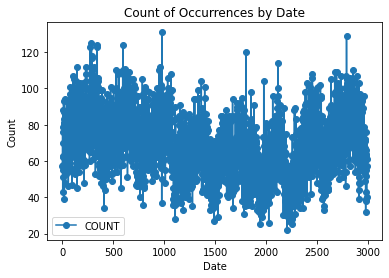

<Figure size 720x432 with 0 Axes>

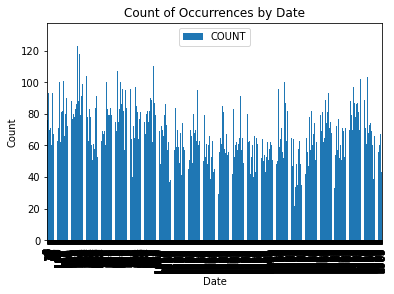

In [8]:
df1 = df2.groupby('DATE').size().reset_index(name='COUNT')
df1 = df1.sort_values('DATE')

plt.figure(figsize=(10, 6))
df1.plot(kind='line', marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Occurrences by Date')
plt.show()

plt.figure(figsize=(10, 6))
df1.plot(kind='bar', width=0.8)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Occurrences by Date')
plt.show()

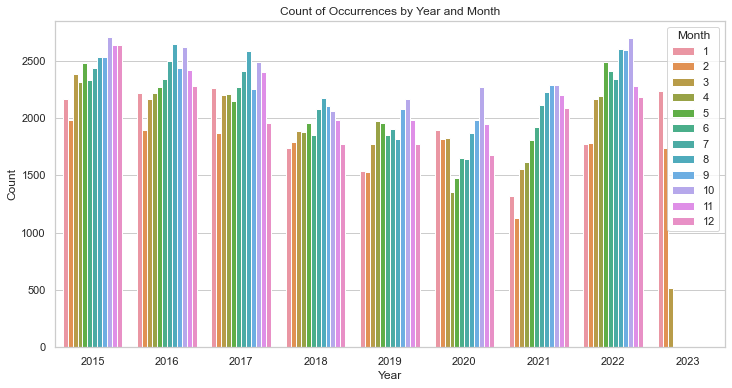

In [9]:
dfx = df2
dfx['DATE'] = pd.to_datetime(dfx['DATE'])
dfx['YEAR'] = dfx['DATE'].dt.year
dfx['MONTH'] = dfx['DATE'].dt.month
dfx = dfx.groupby(['YEAR', 'MONTH']).size().reset_index(name='COUNT')
dfx_sorted = dfx.sort_values('COUNT', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='COUNT', hue='MONTH', data=dfx)
plt.title('Count of Occurrences by Year and Month')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Month', title_fontsize='12', loc='upper right')
plt.show()

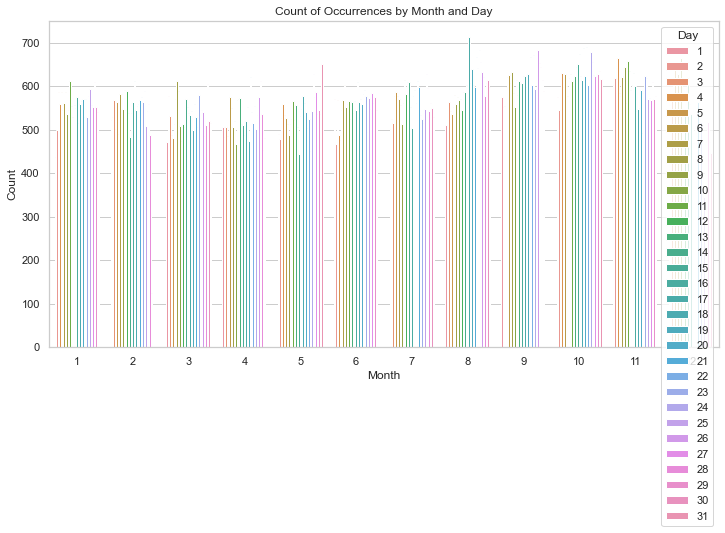

In [10]:
dfx = df2
dfx['DATE'] = pd.to_datetime(dfx['DATE'])
# Extract month and day from 'DATE' column
dfx['MONTH'] = dfx['DATE'].dt.month
dfx['DAY'] = dfx['DATE'].dt.day
dfx = dfx.groupby(['MONTH', 'DAY']).size().reset_index(name='COUNT')
dfx_sorted = dfx.sort_values('COUNT', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='MONTH', y='COUNT', hue='DAY', data=dfx)
plt.title('Count of Occurrences by Month and Day')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Day', title_fontsize='12', loc='upper right')
plt.show()

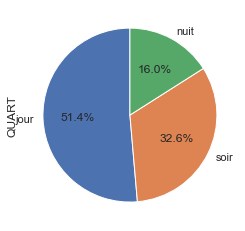

,QUART,COUNT
0,jour,105704
1,nuit,32902
2,soir,67147


In [11]:
df3 = df2.groupby('QUART').size().reset_index(name='COUNT')
value_counts = df2['QUART'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.show()
df3.head()

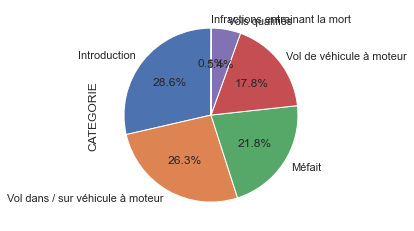

,CATEGORIE,COUNT
0,Infractions entrainant la mort,188
1,Introduction,58847
2,Méfait,44824
3,Vol dans / sur véhicule à moteur,54199
4,Vol de véhicule à moteur,36527


In [12]:
df4 = df2.groupby('CATEGORIE').size().reset_index(name='COUNT')
value_counts = df2['CATEGORIE'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.show()
df4.head()

In [13]:
df5 = df2.groupby('PDQ').size().reset_index(name='COUNT')
df5.head(10)

,PDQ,COUNT
0,1,2648
1,3,4224
2,4,2963
3,5,6517
4,7,10165
5,8,4735
6,9,4117
7,10,4464
8,11,3353
9,12,4213


In [14]:
df5_sorted = df5.sort_values('COUNT', ascending=False)
df5_sorted.head(10)

,PDQ,COUNT
24,38,14581
30,48,10219
4,7,10165
25,39,9476
14,21,9475
18,26,8787
13,20,8386
27,44,8318
16,23,8171
26,42,8139


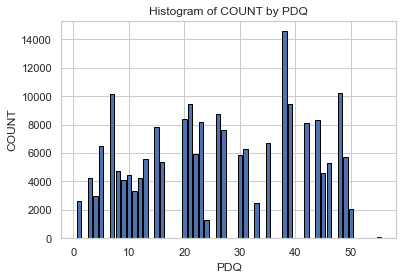

In [15]:
plt.bar(df5_sorted['PDQ'], df5_sorted['COUNT'], edgecolor='black')
plt.xlabel('PDQ')
plt.ylabel('COUNT')
plt.title('Histogram of COUNT by PDQ')
plt.show()

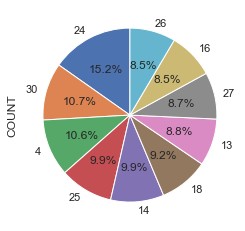

In [16]:
df5_sorted = df5_sorted.head(10)
value_counts = df5_sorted['COUNT']
value_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.show()

In [17]:
grouped_data = df2.groupby(['CATEGORIE', 'QUART']).size().reset_index(name='COUNT')
grouped_data = grouped_data.sort_values('COUNT', ascending=False)
grouped_data

,CATEGORIE,QUART,COUNT
9,Vol dans / sur véhicule à moteur,jour,31404
3,Introduction,jour,26443
6,Méfait,jour,25315
5,Introduction,soir,21311
12,Vol de véhicule à moteur,jour,18746
11,Vol dans / sur véhicule à moteur,soir,17707
8,Méfait,soir,13572
4,Introduction,nuit,11093
14,Vol de véhicule à moteur,soir,8922
13,Vol de véhicule à moteur,nuit,8859


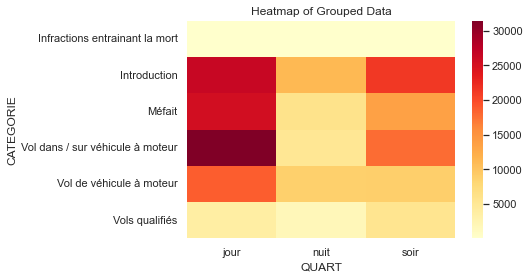

In [18]:
pivot_data = grouped_data.pivot(index='CATEGORIE', columns='QUART', values='COUNT')
sns.heatmap(pivot_data, cmap='YlOrRd')
plt.title('Heatmap of Grouped Data')
plt.xlabel('QUART')
plt.ylabel('CATEGORIE')
plt.show()

In [19]:
grouped_data = df2.groupby(['CATEGORIE', 'PDQ']).size().reset_index(name='COUNT')
grouped_data = grouped_data.sort_values('COUNT', ascending=False)
grouped_data.head(10)

,CATEGORIE,PDQ,COUNT
53,Introduction,38,6386
110,Vol dans / sur véhicule à moteur,20,3865
111,Vol dans / sur véhicule à moteur,21,3695
135,Vol de véhicule à moteur,7,3237
87,Méfait,38,3211
45,Introduction,23,3183
121,Vol dans / sur véhicule à moteur,38,2853
101,Vol dans / sur véhicule à moteur,7,2770
56,Introduction,44,2751
47,Introduction,26,2748


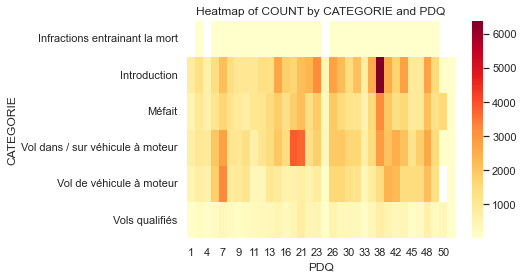

In [20]:
pivot_table = grouped_data.pivot(index='CATEGORIE', columns='PDQ', values='COUNT')
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Heatmap of COUNT by CATEGORIE and PDQ')
plt.xlabel('PDQ')
plt.ylabel('CATEGORIE')
plt.show()

In [21]:
grouped_data = df2.groupby(['PDQ', 'QUART']).size().reset_index(name='COUNT')
grouped_data = grouped_data.sort_values('COUNT', ascending=False)
grouped_data.head(10)

,PDQ,QUART,COUNT
72,38,jour,7182
90,48,jour,5304
12,7,jour,5230
75,39,jour,5031
74,38,soir,4959
42,21,jour,4498
54,26,jour,4469
78,42,jour,4433
81,44,jour,4347
48,23,jour,4046


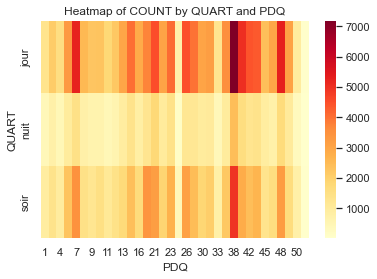

In [22]:
pivot_table = grouped_data.pivot(index='QUART', columns='PDQ', values='COUNT')
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Heatmap of COUNT by QUART and PDQ')
plt.xlabel('PDQ')
plt.ylabel('QUART')
plt.show()

In [23]:
grouped_data = df2.groupby(['CATEGORIE', 'PDQ', 'QUART']).size().reset_index(name='COUNT')
grouped_data = grouped_data.sort_values('COUNT', ascending=False)
grouped_data.head(10)

,CATEGORIE,PDQ,QUART,COUNT
150,Introduction,38,jour,2814
152,Introduction,38,soir,2412
323,Vol dans / sur véhicule à moteur,20,soir,1936
324,Vol dans / sur véhicule à moteur,21,jour,1790
252,Méfait,38,jour,1757
294,Vol dans / sur véhicule à moteur,7,jour,1609
354,Vol dans / sur véhicule à moteur,38,jour,1587
372,Vol dans / sur véhicule à moteur,48,jour,1548
360,Vol dans / sur véhicule à moteur,42,jour,1542
321,Vol dans / sur véhicule à moteur,20,jour,1524


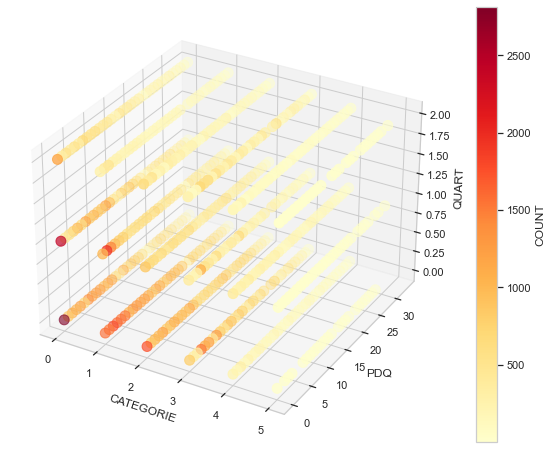

In [24]:
x = pd.factorize(grouped_data['CATEGORIE'])[0]
y = pd.factorize(grouped_data['PDQ'])[0]
z = pd.factorize(grouped_data['QUART'])[0]
count = grouped_data['COUNT']
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = count
norm = plt.Normalize(count.min(), count.max())
cmap = plt.cm.YlOrRd
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
sc = ax.scatter(xs=x, ys=y, zs=z, c=colors, s=100, cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='COUNT')
ax.set_xlabel('CATEGORIE')
ax.set_ylabel('PDQ')
ax.set_zlabel('QUART')
plt.show()

In [25]:
import geopandas as gpd
from shapely.geometry import Point
filename = 'limitespdq.geojson' 
gdf = gpd.read_file(filename)
print(gdf.head())

   PDQ NOM_PDQ                                           geometry
0    1   PDQ-1  MULTIPOLYGON (((-73.84050 45.45690, -73.84220 ...
1    3   PDQ-3  MULTIPOLYGON (((-73.93970 45.47010, -73.93980 ...
2    4   PDQ-4  MULTIPOLYGON (((-73.81590 45.50260, -73.81580 ...
3    5   PDQ-5  MULTIPOLYGON (((-73.72280 45.43200, -73.72270 ...
4    7   PDQ-7  MULTIPOLYGON (((-73.67240 45.53250, -73.67150 ...


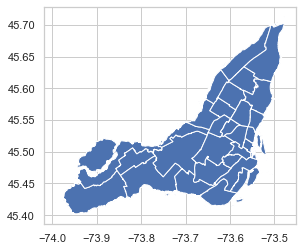

In [26]:
gdf.plot()
plt.show()

<AxesSubplot: >

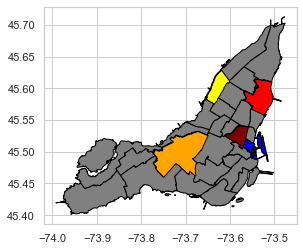

In [27]:
df_data = gpd.GeoDataFrame(df2)
df_geolocation = gpd.GeoDataFrame(gdf)
pdq_38 = df_geolocation[df_geolocation['PDQ'] == 38]
pdq_48 = df_geolocation[df_geolocation['PDQ'] == 48]
pdq_7 = df_geolocation[df_geolocation['PDQ'] == 7]
pdq_39 = df_geolocation[df_geolocation['PDQ'] == 39]
pdq_21 = df_geolocation[df_geolocation['PDQ'] == 21]
fig, ax = plt.subplots()
df_geolocation.plot(ax=ax, facecolor='gray', edgecolor='black')
pdq_38.plot(ax=ax, facecolor='maroon', edgecolor='black')
pdq_48.plot(ax=ax, facecolor='red', edgecolor='black')
pdq_7.plot(ax=ax, facecolor='orange', edgecolor='black')
pdq_39.plot(ax=ax, facecolor='yellow', edgecolor='black')
pdq_21.plot(ax=ax, facecolor='blue', edgecolor='black')